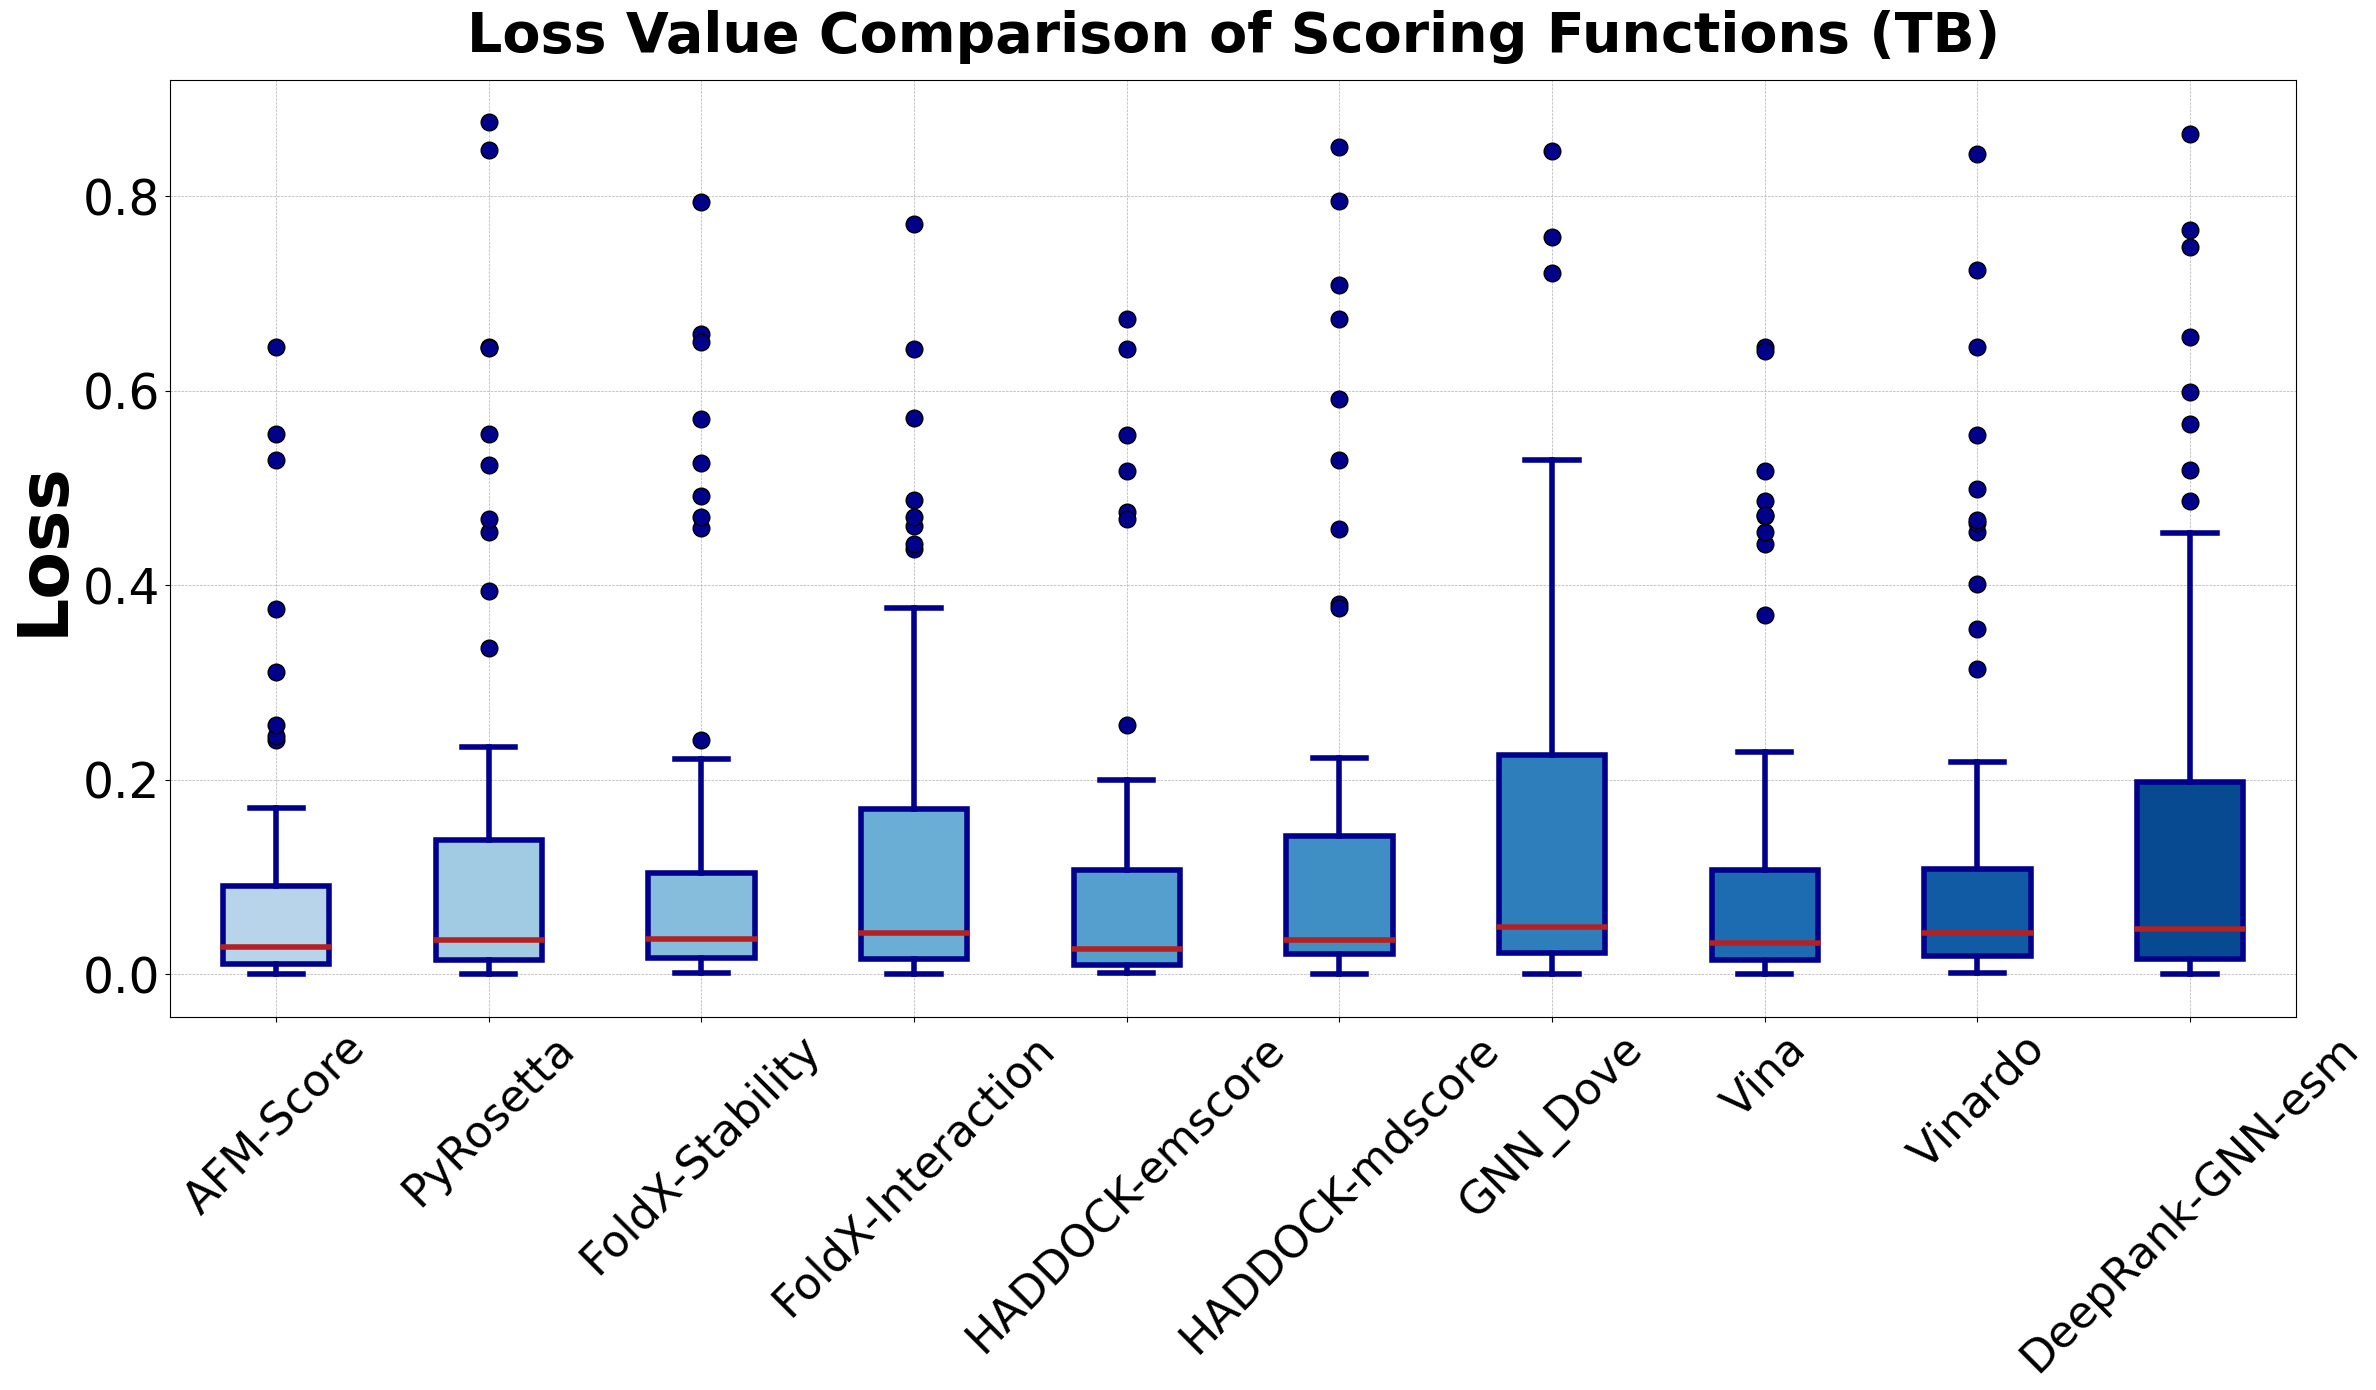

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Define file paths
file_paths = {
    'AFM-Score': '/Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Loss/TB_Loss/AlphaFold_TB.xlsx',
    'PyRosetta': '/Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Loss/TB_Loss/Pyrosetta_TB.xlsx',
    'FoldX-Stability': '/Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Loss/TB_Loss/Foldx_stability_TB.xlsx',
    'FoldX-Interaction': '/Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Loss/TB_Loss/Foldx_Interaction_TB.xlsx',
    'HADDOCK-emscore': '/Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Loss/TB_Loss/Haddock_emscore_TB.xlsx',
    'HADDOCK-mdscore': '/Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Loss/TB_Loss/Haddock_mdscore_TB.xlsx',
    'GNN_Dove': '/Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Loss/TB_Loss/gnn_dove_TB.xlsx',
    'Vina': '/Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Loss/TB_Loss/Vina_loss_TB.xlsx',
    'Vinardo': '/Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Loss/TB_Loss/Vinardo_loss_TB.xlsx',
    'DeepRank-GNN-esm': '/Users/neginmanshour/Desktop/PpEv/Quality_Scoring_Functions/Loss/TB_Loss/Deep_GNN_TB.xlsx'
}

# Load the data from the Excel files into DataFrames
data_frames = {}
problematic_files = []

for label, path in file_paths.items():
    try:
        data_frames[label] = pd.read_excel(path)
        if 'Loss' not in data_frames[label].columns:
            print(f"Warning: '{path}' does not contain a 'Loss' column.")
            problematic_files.append(path)
    except Exception as e:
        print(f"Error reading '{path}': {e}")
        problematic_files.append(path)

# Prepare the data for plotting
data_to_plot = [df['Loss'].dropna().to_numpy() for df in data_frames.values() if 'Loss' in df.columns]
labels = [label for label in data_frames.keys() if 'Loss' in data_frames[label].columns]

# Ensure all data arrays are 1D
data_to_plot = [np.asarray(data).flatten() for data in data_to_plot]

# Verify that lengths of data and labels match
assert len(data_to_plot) == len(labels), "Mismatch between data and label lengths."

# Create the boxplot
plt.figure(figsize=(24, 14))
boxplot = plt.boxplot(data_to_plot, labels=labels, patch_artist=True,
                      boxprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      medianprops=dict(linestyle='-', linewidth=4, color='firebrick'),
                      whiskerprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      capprops=dict(linestyle='-', linewidth=4, color='darkblue'),
                      flierprops=dict(marker='o', markerfacecolor='darkblue', markersize=12, linestyle='none'))

# Set colors for each box
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(labels)))
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Set titles and labels with increased font size
plt.title('Loss Value Comparison of Scoring Functions (TB)', fontsize=40, fontweight='bold', pad=20)
plt.ylabel('Loss', fontsize=50, fontweight='bold')
plt.xticks(rotation=45, fontsize=32)
plt.yticks(fontsize=35)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()
